<a href="https://colab.research.google.com/github/vedharshita/Detecting-Mental-Workload-in-Virtual-Reality/blob/main/4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Mental Workload in Virtual Reality Using EEG Spectral Data: A Deep Learning Approach

---

In [ ]:
## Mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## Import Statements
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
## Setting path for data files on colab
root_dir = "/content/gdrive/MyDrive/VR Mental Workload/"
raw_dir = root_dir + "data/VRData2019/"
model_file_dir = raw_dir + "model_file_dir/"
os.chdir(model_file_dir)

In [ ]:
## Loading final csv in df
features_df = pd.read_csv(r'/content/gdrive/MyDrive/VR Mental Workload/data/VRData2019/model_file_dir/df.csv')
features_df = features_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
features_df = features_df.reindex(sorted(features_df.columns), axis=1)
features_df

train_df = pd.read_csv(r'/content/gdrive/MyDrive/VR Mental Workload/data/VRData2019/model_file_dir/train.csv')
train_df = train_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
train_df = train_df.reindex(sorted(train_df.columns), axis=1)
train_df

test_df = pd.read_csv(r'/content/gdrive/MyDrive/VR Mental Workload/data/VRData2019/model_file_dir/test.csv')
test_df = test_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
test_df = test_df.reindex(sorted(test_df.columns), axis=1)
test_df

print(features_df.shape, train_df.shape, test_df.shape)

(13723, 41) (9148, 41) (4575, 41)


In [ ]:
## Feature scaling - StandardScaler -- Standardize features by removing the mean and scaling to unit variance and Train Test Split
X = features_df[features_df.columns[1:]]
y = features_df['nback']

X_train = train_df[train_df.columns[1:]]
X_test = test_df[test_df.columns[1:]]
y_train = train_df['nback']
y_test = test_df['nback']

In [ ]:
## One hot encode labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [ ]:
## Converting to numpy arrays
X_train1 = X_train.to_numpy()
X_test1 = X_test.to_numpy()
print(X_train1.shape, X_test1.shape)

(9148, 40) (4575, 40)


In [ ]:
## Reshaping the input
X_train1 = X_train1.reshape((X_train1.shape[0],1,X_train1.shape[1]))
X_test1 = X_test1.reshape((X_test1.shape[0],1,X_test1.shape[1]))

### **STEP 8: DL Modeling - LSTM**


In [ ]:
## LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape = (1,40), activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             26880     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1

In [ ]:
## Fitting the model
hist = model.fit(X_train1, y_train1, validation_data=(X_test1,y_test1), epochs = 110)
# score, acc = model.evaluate(X_test, y_test)

Epoch 1/110
286/286 [==============================] - 8s 10ms/step - loss: 1.0784 - accuracy: 0.3830 - val_loss: 1.1804 - val_accuracy: 0.3143
Epoch 2/110
286/286 [==============================] - 2s 9ms/step - loss: 0.9458 - accuracy: 0.5099 - val_loss: 1.3038 - val_accuracy: 0.3226
Epoch 3/110
286/286 [==============================] - 2s 8ms/step - loss: 0.8464 - accuracy: 0.5888 - val_loss: 1.4861 - val_accuracy: 0.3259
Epoch 4/110
286/286 [==============================] - 2s 9ms/step - loss: 0.7409 - accuracy: 0.6677 - val_loss: 1.7493 - val_accuracy: 0.3069
Epoch 5/110
286/286 [==============================] - 2s 9ms/step - loss: 0.6580 - accuracy: 0.7184 - val_loss: 1.6207 - val_accuracy: 0.3478
Epoch 6/110
286/286 [==============================] - 2s 9ms/step - loss: 0.5956 - accuracy: 0.7574 - val_loss: 1.6488 - val_accuracy: 0.3113
Epoch 7/110
286/286 [==============================] - 3s 9ms/step - loss: 0.5536 - accuracy: 0.7757 - val_loss: 1.9130 - val_accuracy: 0.315

In [ ]:
## Predicting from model
pred = model.predict(X_test1)
predict_classes = np.argmax(pred,axis=1)
predict_classes

array([2, 2, 2, ..., 1, 0, 0])

In [ ]:
## Test Accuracy
correct = accuracy_score(y_test,predict_classes)
print(f"Test Accuracy: {correct}")

Test Accuracy: 0.30950819672131147


In [ ]:
## Confusion Matrix
print(classification_report(y_test, predict_classes))

              precision    recall  f1-score   support

           0       0.30      0.29      0.29      1525
           1       0.30      0.44      0.36      1525
           2       0.34      0.20      0.25      1525

    accuracy                           0.31      4575
   macro avg       0.31      0.31      0.30      4575
weighted avg       0.31      0.31      0.30      4575



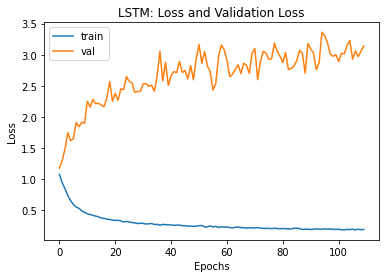

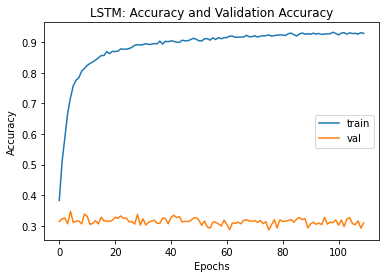

In [ ]:
# Making plots
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.title('LSTM: Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.show()

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.title('LSTM: Accuracy and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.show()